In [1]:
using OpenStreetMapX, OpenStreetMapXPlot
map_data = get_map_data("planet_-74.023_40.693_688c6751.osm",use_cache = false);

println("The map contains $(length(map_data.nodes)) nodes")

The map contains 38737 nodes


In [2]:
# node_ids = collect(keys(map_data.nodes)) 
# [LLA(map_data.nodes[n],map_data.bounds) for n in routes[1]]

In [26]:
# origin = generate_point_in_bounds(map_data);
# destination = generate_point_in_bounds(map_data);

# pointA = point_to_nodes(origin, map_data)
# pointB = point_to_nodes(destination, map_data)

# shortest_route1, shortest_distance1, shortest_time1 = shortest_route(map_data, pointA, pointB)
# fastest_route1, fastest_distance1, fastest_time1 = fastest_route(map_data, pointA, pointB)

# println("shortest_route nodes: ",shortest_route1)
# println("fastest route nodes: ",fastest_route1)

In [3]:
using CSVFiles, DataFrames
df = DataFrame(load("nyc-taxi-trip-duration\\train.csv"))
first(df,5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count
,String,Int64,Dates.D…,Dates.D…,Int64
1,id2875421,2,2016-03-14T17:24:55,2016-03-14T17:32:30,1
2,id2377394,1,2016-06-12T00:43:35,2016-06-12T00:54:38,1
3,id3858529,2,2016-01-19T11:35:24,2016-01-19T12:10:48,1
4,id3504673,2,2016-04-06T19:32:31,2016-04-06T19:39:40,1
5,id2181028,2,2016-03-26T13:30:55,2016-03-26T13:38:10,1


In [4]:
# df[!,[:id,:pickup_datetime,:dropoff_datetime,:pickup_longitude,:pickup_latitude,:dropoff_longitude,:dropoff_latitude,:trip_duration]]
df = select(df, Not(:vendor_id), copycols=false)
df = select(df, Not(:passenger_count), copycols=false)
df = select(df, Not(:store_and_fwd_flag), copycols=false)
first(df,5)

,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude
,String,Dates.D…,Dates.D…,Float64,Float64
1,id2875421,2016-03-14T17:24:55,2016-03-14T17:32:30,-73.9822,40.7679
2,id2377394,2016-06-12T00:43:35,2016-06-12T00:54:38,-73.9804,40.7386
3,id3858529,2016-01-19T11:35:24,2016-01-19T12:10:48,-73.979,40.7639
4,id3504673,2016-04-06T19:32:31,2016-04-06T19:39:40,-74.01,40.72
5,id2181028,2016-03-26T13:30:55,2016-03-26T13:38:10,-73.9731,40.7932


In [5]:
df_test = df[1:1000,:]
first(df_test,4)

,id,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude
,String,Dates.D…,Dates.D…,Float64,Float64
1,id2875421,2016-03-14T17:24:55,2016-03-14T17:32:30,-73.9822,40.7679
2,id2377394,2016-06-12T00:43:35,2016-06-12T00:54:38,-73.9804,40.7386
3,id3858529,2016-01-19T11:35:24,2016-01-19T12:10:48,-73.979,40.7639
4,id3504673,2016-04-06T19:32:31,2016-04-06T19:39:40,-74.01,40.72


In [6]:
println(names(df))
println(size(df,1))
eltype.(eachcol(df))

["id", "pickup_datetime", "dropoff_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "trip_duration"]
1458644


8-element Array{DataType,1}:
 String
 Dates.DateTime
 Dates.DateTime
 Float64
 Float64
 Float64
 Float64
 Int64

In [179]:
eltype.(Destination)

42427324

In [7]:
pickup_longitude = df_test[!, :pickup_longitude]
pickup_latitude = df_test[!,:pickup_latitude]
dropoff_longitude = df_test[!, :dropoff_longitude]
dropoff_latitude = df_test[!,:dropoff_latitude]

pickup = map((i,j)->(i,j), pickup_latitude,pickup_longitude)
dropoff = map((i,j)->(i,j),dropoff_latitude, dropoff_longitude)
println("合并起讫点OD数据")

合并起讫点OD数据


In [29]:
df_ID = df[:,:id]

1458644-element Array{String,1}:
 "id2875421"
 "id2377394"
 "id3858529"
 "id3504673"
 "id2181028"
 "id0801584"
 "id1813257"
 "id1324603"
 "id1301050"
 "id0012891"
 "id1436371"
 "id1299289"
 "id1187965"
 ⋮
 "id0469946"
 "id2432342"
 "id3445276"
 "id3027038"
 "id0405770"
 "id1920898"
 "id1454193"
 "id2376096"
 "id1049543"
 "id2304944"
 "id2714485"
 "id1209952"

In [ ]:
# Origin = Vector{Vector{Int}}()
# Destination = Vector{Vector{Int}}()
# df_od = DataFrame(Origin = Int[], Destination = Int[])
# k = Array(Int64/Float64, n)

In [32]:
Origin = []
Destination = []
df_ID = df_test[:,:id]
for i in 1:size(df_test,1)
    push!(Origin,point_to_nodes(pickup[i],map_data))
    push!(Destination,point_to_nodes(dropoff[i],map_data))
end
df_od = DataFrame([df_ID,Origin,Destination])
df_od = select(df_od,:x1 => :id, :x2 => :Origin, :x3 => :Destination) 
println("匹配路网节点并构建数据框")

匹配路网节点并构建数据框


,id,Origin,Destination
,Any,Any,Any
1,id2875421,1825841704,42449985
2,id2377394,42436590,1692433941
3,id3858529,4544486781,42448593
4,id3504673,42436056,42428366


In [170]:
df_od_test = DataFrame([String,String,String],[:id,:Origin,:Destination],[df_ID,Origin,Destination])
# df_od_test[:,[:id,:Origin,:Destination]] = [df_ID,Origin,Destination]

MethodError: MethodError: no method matching DataFrame(::Array{DataType,1}, ::Array{Symbol,1}, ::Array{Array{Any,1},1})
Closest candidates are:
  DataFrame(::AbstractArray{T,1}, ::AbstractArray{Symbol,1}) where T<:Type at C:\Users\24829\.julia\packages\DataFrames\SOhkD\src\dataframe\dataframe.jl:277
  DataFrame(::AbstractArray{T,1}, ::AbstractArray{Symbol,1}, !Matched::Integer; makeunique) where T<:Type at C:\Users\24829\.julia\packages\DataFrames\SOhkD\src\dataframe\dataframe.jl:277
  DataFrame(::AbstractArray{T,1}, ::AbstractArray{Symbol,1}, !Matched::AbstractArray{Bool,1}, !Matched::Integer; makeunique) where T<:Type at C:\Users\24829\.julia\packages\DataFrames\SOhkD\src\deprecated.jl:11
  ...

In [169]:
df_od_test

,id,Origin,Destination
,String,String,String


In [152]:
df_jion = innerjoin(df_od,df_test,on = :id)
println("合并数据")
first(df_jion,4)

合并数据


,id,Origin,Destination,pickup_datetime,dropoff_datetime,pickup_longitude
,Any,Any,Any,Dates.D…,Dates.D…,Float64
1,id2875421,1825841704,42449985,2016-03-14T17:24:55,2016-03-14T17:32:30,-73.9822
2,id2377394,42436590,1692433941,2016-06-12T00:43:35,2016-06-12T00:54:38,-73.9804
3,id3858529,4544486781,42448593,2016-01-19T11:35:24,2016-01-19T12:10:48,-73.979
4,id3504673,42436056,42428366,2016-04-06T19:32:31,2016-04-06T19:39:40,-74.01


In [164]:
eltype.(eachcol(df_jion))

10-element Array{DataType,1}:
 String
 Any
 Any
 Dates.DateTime
 Dates.DateTime
 Float64
 Float64
 Float64
 Float64
 Int64

In [163]:
# df_jion[!,:id] = String.(df_jion[:,:id])
df_jion[:,:Origin] = convert.(String,df_jion[!,:Origin])

MethodError: MethodError: Cannot `convert` an object of type Int64 to an object of type String
Closest candidates are:
  convert(::Type{String}, !Matched::WeakRefStrings.WeakRefString) at C:\Users\24829\.julia\packages\WeakRefStrings\lqf5B\src\WeakRefStrings.jl:79
  convert(::Type{String}, !Matched::TextParse.VectorBackedUTF8String) at C:\Users\24829\.julia\packages\TextParse\EETm2\src\VectorBackedStrings.jl:84
  convert(::Type{String}, !Matched::CategoricalValue) at C:\Users\24829\.julia\packages\CategoricalArrays\nd8kj\src\value.jl:60
  ...

In [155]:
# (notice that : instead of !) to avoid making two copies.  ==> df[:,:x] = convert.(Bool,df[!,:x])
df_jion[!,:id] = String.(df_jion[:,:id])
df_jion[!,:Origin] = String.(df_jion[:,:Origin])
df_jion[!,:Destination] = String.(df_jion[:,:Destination])
eltype.(eachcol(df_jion))

MethodError: MethodError: no method matching String(::Int64)
Closest candidates are:
  String(!Matched::String) at boot.jl:321
  String(!Matched::Array{UInt8,1}) at strings/string.jl:39
  String(!Matched::Base.CodeUnits{UInt8,String}) at strings/string.jl:77
  ...

In [119]:
# test = DataFrame(Dict("start" => ["a", "b", "a", "d"],
#                         "finish" => ["b", "c", "e", "e"],
#                         "weights" => 1:4,
#                            ))
# mdg_test = MetaDiGraph(test, :start, :finish,weight=:weights)

In [135]:
test = DataFrame(Dict("start" => ["a", "b", "a", "d"],
                           "finish" => ["b", "c", "e", "e"],
                           "weights" => 1:4,
                           "extras" => 5:8))

,extras,finish,start,weights
,Int64,String,String,Int64
1,5,b,a,1
2,6,c,b,2
3,7,e,a,3
4,8,e,d,4


In [148]:
mgw_test = MetaDiGraph(test, :start, :finish,
                       weight=:weights,
                       ) # edge_attributes=:extras
props(mgw_test)
is_bipartite(mgw_test)

true

In [147]:
# test = MetaDiGraph(df_jion, :Origin, :Destination, weight=:trip_duration)
mgw = MetaDiGraph(df_jion, :Origin, :Destination,weight=:trip_duration,edge_attributes = :trip_duration)
println(props(mgw, 1, 2))
is_bipartite(mgw)

Dict{Symbol,Any}()


false

In [37]:
using LightGraphs, MetaGraphs, GraphDataFrameBridge
mgw = MetaDiGraph(df_jion, :Origin, :Destination,edge_attributes = :trip_duration)  #  weight=:trip_duration,
println("转换成有向图")

{1293, 993} undirected Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [124]:
props(mgw, 400)

Dict{Symbol,Any} with 1 entry:
  :name => 42436598

In [91]:
# props(mgw, 3)
get_prop(mgw, 230, :name)

42430984

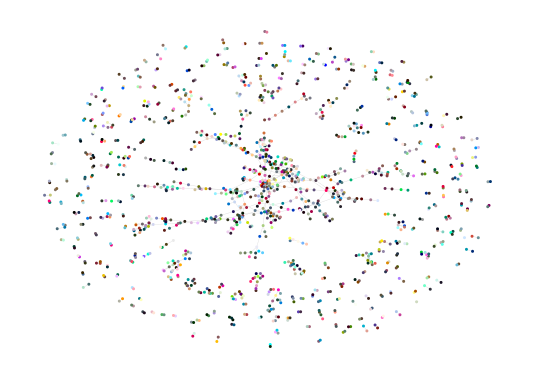

In [126]:
using GraphPlot, Compose, Colors, Graphs
import Cairo,Fontconfig
nodelabel = [1:1293]
nodefillc = distinguishable_colors(1293, colorant"blue")
gplot(test, nodefillc=nodefillc)

# draw(PNG("OD_plot.png", 13cm, 13cm), gplot(mgw,, nodefillc=nodefillc))

In [65]:
a_star(mgw, Origin, Destination)

MethodError: MethodError: no method matching a_star(::MetaGraph{Int64,Float64}, ::Array{Any,1}, ::Array{Any,1})
Closest candidates are:
  a_star(::LightGraphs.AbstractGraph{U}, !Matched::Integer, !Matched::Integer) where U at C:\Users\24829\.julia\packages\LightGraphs\siFgP\src\shortestpaths\astar.jl:73
  a_star(::LightGraphs.AbstractGraph{U}, !Matched::Integer, !Matched::Integer, !Matched::AbstractArray{T,2}) where {T, U} at C:\Users\24829\.julia\packages\LightGraphs\siFgP\src\shortestpaths\astar.jl:73
  a_star(::LightGraphs.AbstractGraph{U}, !Matched::Integer, !Matched::Integer, !Matched::AbstractArray{T,2}, !Matched::Function) where {T, U} at C:\Users\24829\.julia\packages\LightGraphs\siFgP\src\shortestpaths\astar.jl:73

In [129]:

# println(Origin)
# println(Destination)
println("匹配路网节点")

sr  = shortest_route(map_data,Origin[],Destination[])[1]
println(length(sr))
println("最短路路线")

3799572066
42427324
匹配路网节点


In [137]:
route, route_time  = shortest_route(map_data,Origin,Destination)
println(route_time)

4586.571540935278


In [159]:
# shortest_route(map_data,Origin,Destination)

([3799572066, 4443775465, 7167585630, 7167585627, 3004844986, 4557517549, 358448394, 42437688, 42427817, 42438672  …  5216470727, 42436763, 42452026, 42433574, 42452040, 42449570, 42428436, 42452048, 42445489, 42427324], 4586.571540935278, 321.7565535396383)

In [136]:
# [point_to_nodes(generate_point_in_bounds(map_data), map_data) for _ in 1:2]

2-element Array{Int64,1}:
 254484327
  61273001

In [138]:
# routes = Vector{Vector{Int}}()
# visits = Dict{Int,Int}()
# push!(routes, route)
# for n in route
#     visits[n] = get(visits, n,0)+1
# end

In [175]:
import Plots
Plots.gr()
p = OpenStreetMapXPlot.plotmap(map_data,width=360,height=576);

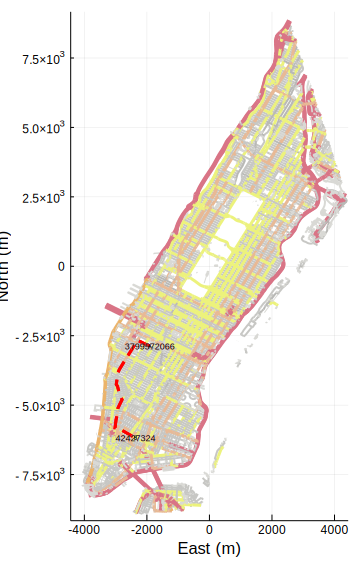

In [177]:
addroute!(p,map_data,sr;route_color="red",fontsize=3);
plot_nodes!(p,map_data,[sr[1],sr[end]],start_numbering_from=nothing,fontsize=6,color="pink");
p

In [164]:
# using PyCall
# flm = pyimport("folium")
# matplotlib_cm = pyimport("matplotlib.cm")
# matplotlib_colors = pyimport("matplotlib.colors")

# cmap = matplotlib_cm.get_cmap("prism")